LD_LIBRARY_PATH updated successfully.


PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0-dev (git: f3110b4e3) compiled on Oct 22 2020 at 15:05:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /scratch/work/hockygroup/software/plumed2-icc-Sept2020/lib/plumed
PLUMED: For installed feature, see /scratch/work/hockygroup/software/plumed2-icc-Sept2020/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite wh

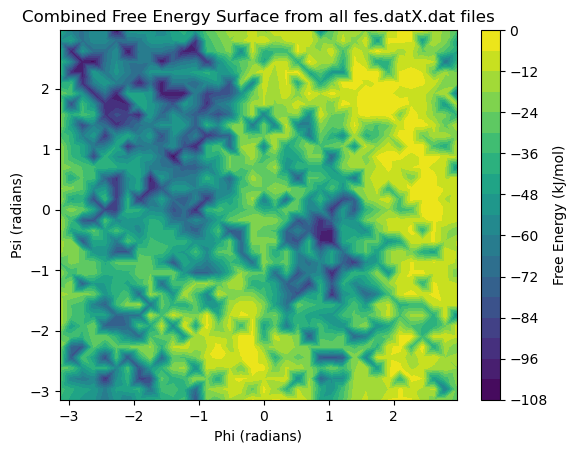

In [4]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt

# Step 1: 更新LD_LIBRARY_PATH以包含PLUMED和Intel库
try:
    if "LD_LIBRARY_PATH" in os.environ:
        os.environ["LD_LIBRARY_PATH"] += ":/scratch/work/courses/CHEM-GA-2671-2024fa/software/plumed2-icc-Sept2020/lib"
        os.environ["LD_LIBRARY_PATH"] += ":/share/apps/intel/2023.1.0/compiler/2023.1.0/linux/compiler/lib/intel64_lin"
    else:
        os.environ["LD_LIBRARY_PATH"] = "/scratch/work/courses/CHEM-GA-2671-2024fa/software/plumed2-icc-Sept2020/lib:/share/apps/intel/2023.1.0/compiler/2023.1.0/linux/compiler/lib/intel64_lin"
    print("LD_LIBRARY_PATH updated successfully.")
except Exception as e:
    print(f"Error occurred while updating environment paths: {e}")

# Step 2: 生成FES文件
try:
    result = subprocess.run(['/scratch/work/courses/CHEM-GA-2671-2024fa/software/plumed2-icc-Sept2020/bin/plumed', 
                             'sum_hills', '--hills', 'HILLS', '--outfile', 'fes.dat', '--stride', '1000'], 
                            check=True)
    print("FES file generated successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error occurred while generating FES: {e}")

# Step 3: 查找所有 fes.datX.dat 文件
fes_files = sorted([f for f in os.listdir() if f.startswith('fes.dat') and f.endswith('.dat')])
print(f"Found {len(fes_files)} FES files: {fes_files}")

# Step 4: 初始化用于存储合并数据的数组
combined_data = []

# Step 5: 读取每个 fes.datX.dat 文件并合并数据
for fes_file in fes_files:
    try:
        data = np.loadtxt(fes_file)
        combined_data.append(data)
        print(f"Loaded data from {fes_file}")
    except Exception as e:
        print(f"Error reading {fes_file}: {e}")

# Step 6: 将所有文件的数据合并成一个大数组
if combined_data:
    combined_data = np.vstack(combined_data)
    
    # 提取 X, Y, Z 数据 (假设文件的列为: X, Y, Free_energy)
    grid_x = combined_data[:, 0]
    grid_y = combined_data[:, 1]
    grid_z = combined_data[:, 2]
    
    # Step 7: 绘制等高线图
    plt.tricontourf(grid_x, grid_y, grid_z, levels=20, cmap='viridis')
    plt.colorbar(label='Free Energy (kJ/mol)')
    plt.xlabel('Phi (radians)')
    plt.ylabel('Psi (radians)')
    plt.title('Combined Free Energy Surface from all fes.datX.dat files')
    plt.savefig('Combined_FES_contour.png')  # 保存合并后的图像
    plt.show()
else:
    print("No FES data loaded.")